#FA1 - Diamonds Dataset - Visualization and Transformation

#Importing Libraries

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Loading Data

In [8]:
df = pd.read_csv('diamonds.csv')
df.head(), df.info(), df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


(   carat      cut color clarity  depth  table  price     x     y     z
 0   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
 1   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
 2   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
 3   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
 4   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75,
 None,
               carat         depth         table         price             x  \
 count  53940.000000  53940.000000  53940.000000  53940.000000  53940.000000   
 mean       0.797940     61.749405     57.457184   3932.799722      5.731157   
 std        0.474011      1.432621      2.234491   3989.439738      1.121761   
 min        0.200000     43.000000     43.000000    326.000000      0.000000   
 25%        0.400000     61.000000     56.000000    950.000000      4.710000   
 50%        0.700000     61.800000     57.000000   2401.000000      5.700000   


#Visualizations

In [9]:
# Set the aesthetic style of the plots
sns.set_style("whitegrid")

##(Discrete) Distribution by cut quality, color, and clarity

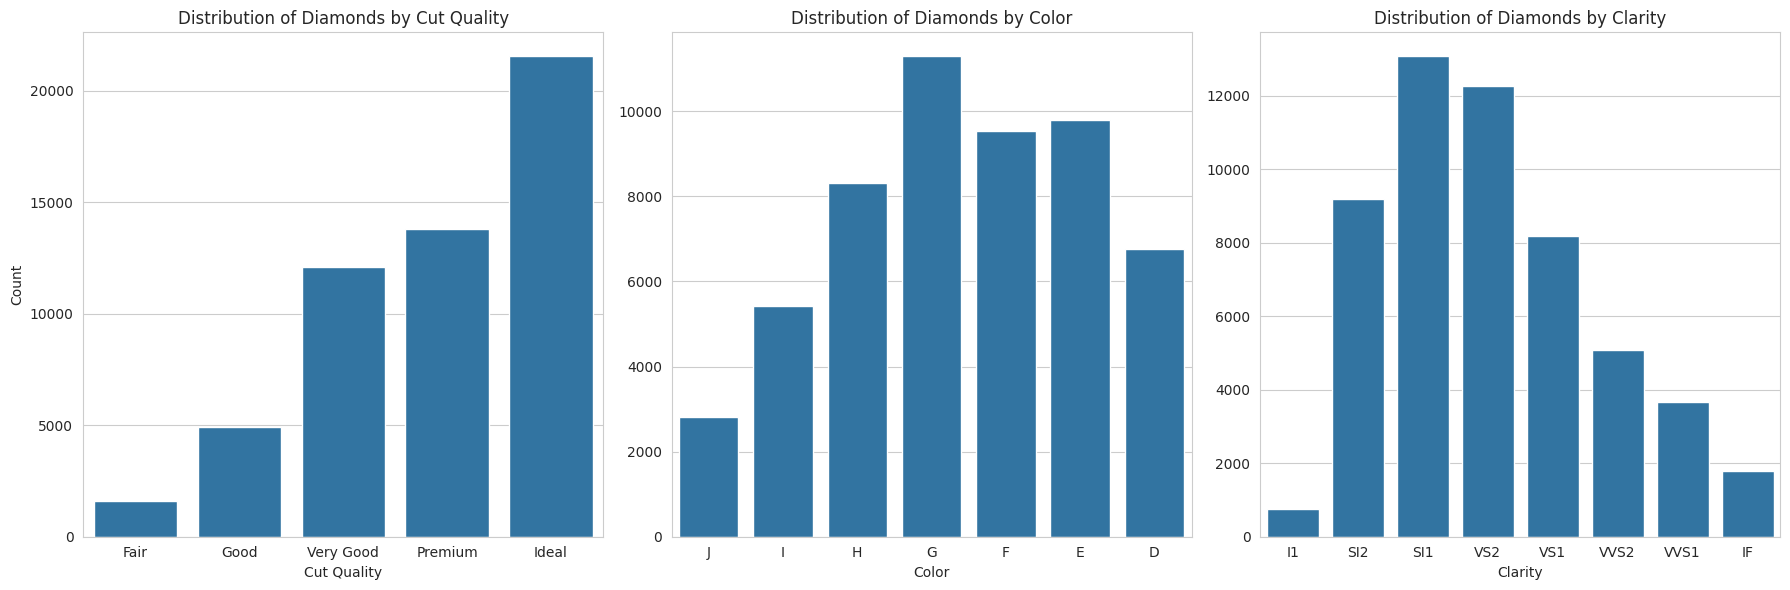

In [14]:
fig, ax = plt.subplots(1, 3, figsize=(18, 6))

sns.countplot(x='cut', data=df, order=['Fair', 'Good', 'Very Good', 'Premium', 'Ideal'], ax=ax[0])
ax[0].set_title('Distribution of Diamonds by Cut Quality')
ax[0].set_xlabel('Cut Quality')
ax[0].set_ylabel('Count')

sns.countplot(x='color', data=df, order=['J', 'I', 'H', 'G', 'F', 'E', 'D'], ax=ax[1])
ax[1].set_title('Distribution of Diamonds by Color')
ax[1].set_xlabel('Color')
ax[1].set_ylabel('')

sns.countplot(x='clarity', data=df, order=['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF'], ax=ax[2])
ax[2].set_title('Distribution of Diamonds by Clarity')
ax[2].set_xlabel('Clarity')
ax[2].set_ylabel('')

plt.tight_layout()

These plots shows the distribution of diamonds across different cut qualities, colors, and clarities. Ideal cuts are the most common, indicating a preference or abundance of high-quality cuts in the dataset. The color distribution shows a preference towards the higher quality end (G to J), and clarity trends towards the slightly included categories (SI1 and SI2).

##(Continuous) Distribution of Carat, Price, and Depth

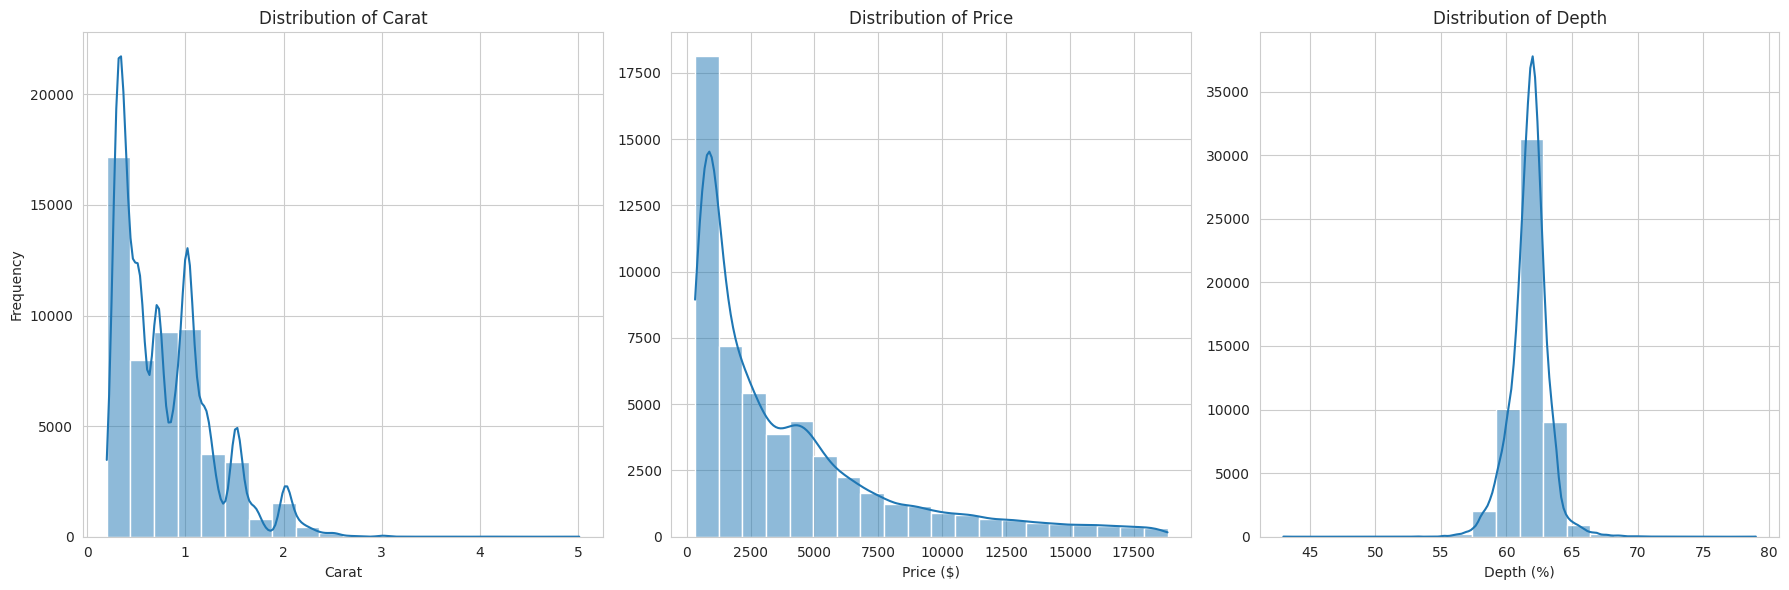

In [16]:
fig, ax = plt.subplots(1, 3, figsize=(18, 6))

sns.histplot(df['carat'], bins=20, kde=True, ax=ax[0])
ax[0].set_title('Distribution of Carat')
ax[0].set_xlabel('Carat')
ax[0].set_ylabel('Frequency')

sns.histplot(df['price'], bins=20, kde=True, ax=ax[1])
ax[1].set_title('Distribution of Price')
ax[1].set_xlabel('Price ($)')
ax[1].set_ylabel('')

sns.histplot(df['depth'], bins=20, kde=True, ax=ax[2])
ax[2].set_title('Distribution of Depth')
ax[2].set_xlabel('Depth (%)')
ax[2].set_ylabel('')

plt.tight_layout()

These histograms show the distributions of continuous variables. Carat weight shows a right-skewed distribution, indicating that smaller diamonds are more common. Price also follows a right-skewed distribution, reflecting that lower-priced diamonds are more abundant. The depth percentage distribution is more symmetrical, centering around the standard depth percentages recommended for diamonds.

##Covariations - Price v Carat by Cut Quality

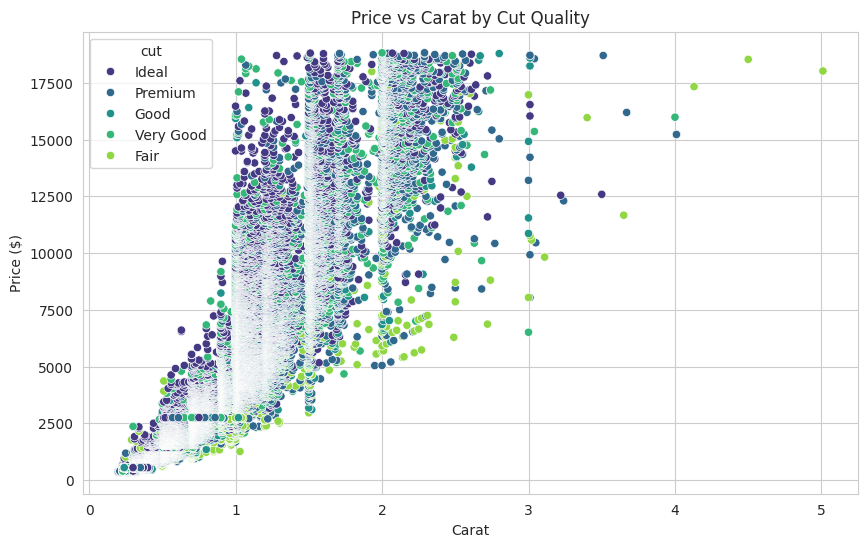

In [12]:
# Visualization 3: Covariations (showing only one due to space, focusing on Price vs Carat)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='carat', y='price', data=df, hue='cut', palette='viridis')
plt.title('Price vs Carat by Cut Quality')
plt.xlabel('Carat')
plt.ylabel('Price ($)')

plt.show()

The scatter plot highlights the positive relationship between carat weight and price, with different cut qualities represented by colors. It shows that as the carat weight increases, the price also tends to increase, albeit with a wide variance. The plot also indicates that higher-quality cuts (ex. Ideal) are available across a wide range of carat weights and prices.

#Data Transfomation

##Price per Carat

In [23]:
df['price_per_carat'] = df['price'] / df['carat']
df['price_per_carat'].describe()

count    53940.000000
mean      4008.394796
std       2012.665747
min       1051.162791
25%       2477.944444
50%       3495.198031
75%       4949.599702
max      17828.846154
Name: price_per_carat, dtype: float64

The price per carat across the dataset ranges from approximately 1,051 to 17,829, with a mean of approximately 4,008. This wide range indicates significant variability in diamond pricing efficiency, which could be influenced by factors such as cut, color, and clarity.

##Filtering: Ideal Cuts only

In [18]:
ideal_cut_df = df[df['cut'] == 'Ideal']


A filter is applied to focus on diamonds with an 'Ideal' cut. This subset can be analyzed further to understand the characteristics of diamonds that are considered to have the best cuts in terms of proportions and symmetry.



##Making a New Column for L to W Ratio

In [25]:
df['length_to_width_ratio'] = df['x'] / df['y']
df['length_to_width_ratio'].describe()

count    53933.000000
mean         0.999409
std          0.012434
min          0.000000
25%          0.992625
50%          0.995745
75%          1.006944
max          1.615572
Name: length_to_width_ratio, dtype: float64

The length to width ratio for diamonds in the dataset has a mean very close to 1 (0.999), indicating that for many diamonds, the length and width are nearly equal. This ratio provides insights into the shape characteristics of the diamonds, where a ratio close to 1 typically indicates a more symmetrical diamond. The minimum value is 0 (which may indicate measurement errors), and the maximum value is 1.615, suggesting some diamonds have significantly longer lengths compared to their widths.